In [20]:
import cv2
import numpy as np

# Read image
im = cv2.imread("(2.1).jpeg",cv2.IMREAD_REDUCED_COLOR_4)

# Set up the parameters for blob detection
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 100
params.maxArea = 1000000
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False


# Create the detector with the specified parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(im)

# Draw detected blobs as red circles
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show keypoints
cv2.namedWindow("Keypoints", cv2.WINDOW_NORMAL)  # Create a resizable window
cv2.resizeWindow("Keypoints", 800, 600)  # Set the window size (adjust as needed)
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np
from skimage.feature import blob_log
from skimage.color import rgb2gray

# Read the image

im = cv2.imread('(2.1).jpeg',cv2.IMREAD_REDUCED_COLOR_4)

# Convert the image to grayscale
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
#im_blur = cv2.GaussianBlur(im_gray, (0, 0), 1.5)

# Perform blob detection using the Laplacian of Gaussians (LoG)
blobs = blob_log(im_gray, max_sigma=30, threshold=0.1)

# Draw circles on the original image for detected blobs
if blobs is not None:
    for blob in blobs:
        y, x, r = blob
        cv2.circle(im, (int(x), int(y)), int(r), (0, 0, 255), 1)  # Draw a red circle


# Display the image with detected circles
cv2.namedWindow("Blob Detection", cv2.WINDOW_NORMAL)  # Create a resizable window
cv2.resizeWindow("Blob Detection", 800, 600)  # Set the window size (adjust as needed)
cv2.imshow("Blob Detection", im)
cv2.waitKey(0)
cv2.destroyAllWindows()




In [4]:
import cv2 as cv
import numpy as np
from skimage.feature import blob_log
from math import sqrt

im = cv.imread('(2.1).jpeg', cv.IMREAD_REDUCED_COLOR_4)
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Create a three-channel grayscale image
gray_three_channel = cv.merge([gray, gray, gray])

# Apply Gaussian blur to reduce noise
blurred = cv.GaussianBlur(gray, (9, 9), 0.1)

# Define parameters for blob detection
min_sigma = 1
max_sigma = 30
threshold = .1

# Detect blobs using Laplacian of Gaussians
blobs = blob_log(blurred, min_sigma=min_sigma,max_sigma=max_sigma, threshold=threshold)
blobs[:, 2] = blobs[:, 2] * sqrt(2)

max_radius_index = np.argmax(blobs[:, 2])
largest_circle_params = blobs[max_radius_index]
y, x, r = largest_circle_params
print(f"Radius (r): {r}")
print(f"Center (x, y): ({x}, {y})")

# Draw circles on the original grayscale image
for blob in blobs:
    y, x, r = blob  # Blob format is (y, x, r)
    cv.circle(gray_three_channel, (int(x), int(y)), int(r), (0,0,255), 2)  # Draw circles in white

# Display the result
cv.imshow('Detected Circles', gray_three_channel)
cv.waitKey(0)
cv.destroyAllWindows()

Radius (r): 42.42640687119285
Center (x, y): (234.0, 0.0)


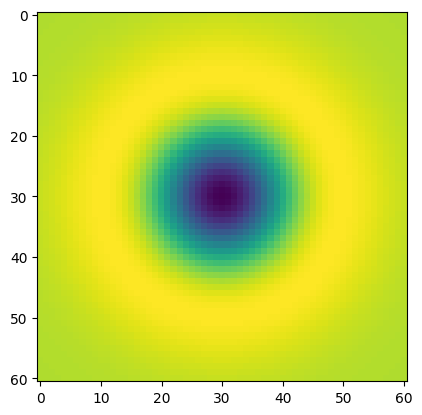

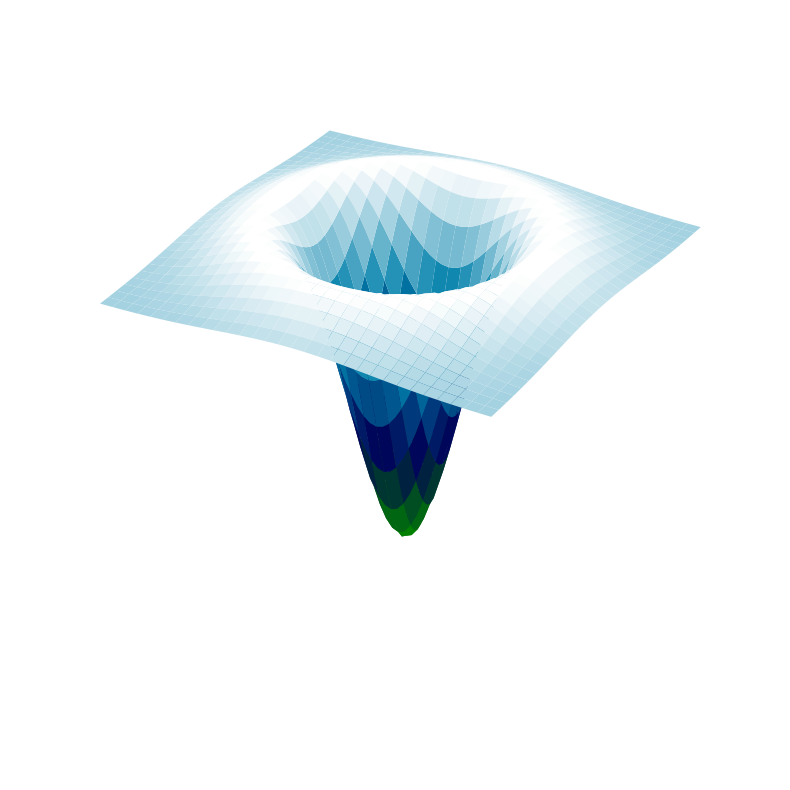

In [5]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 10
hw = 3*sigma
X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))

plt.imshow(log)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, log, cmap=cm.ocean, linewidth = 0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.axis('off')
plt.show()

(35, 35, 5)
10


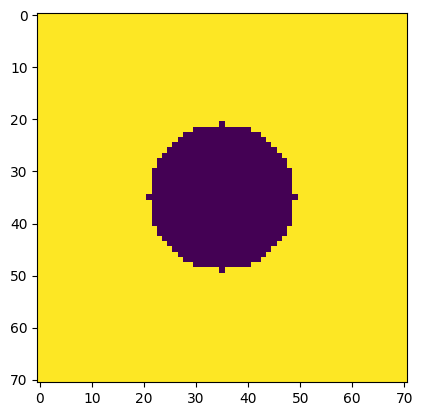

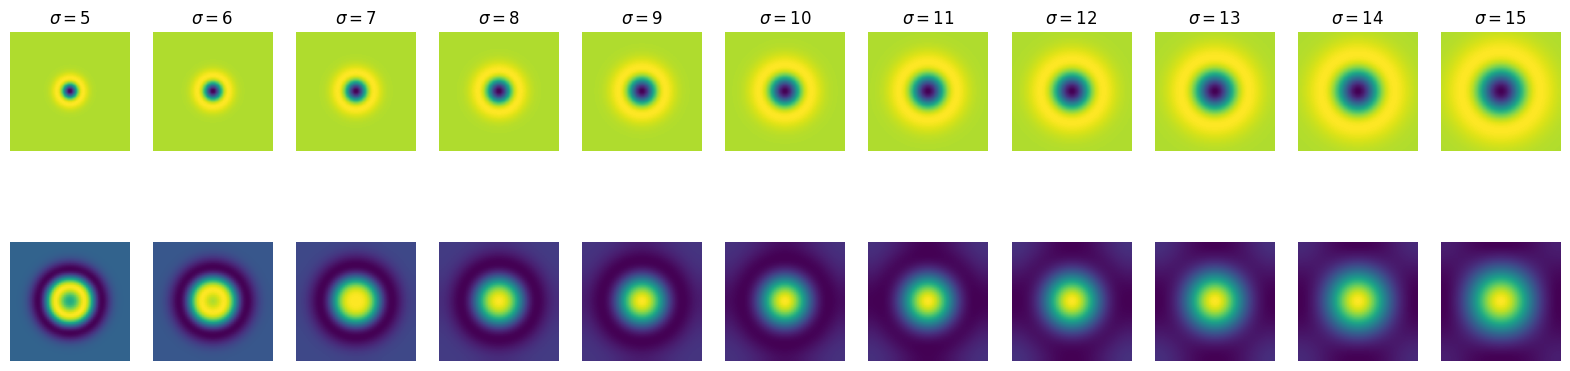

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

w, h = 71, 71
hw, hh = w//2, h//2
f = np.ones((h,w), dtype=np.float32)*255
X, Y = np.meshgrid(np.arange(-hh, hh + 1, 1), np.arange(-hw, hw + 1, 1))
r = w//5 # 14
f *= X**2 + Y**2 >  r**2
plt.imshow(f)
s = 11
fig, ax = plt.subplots(2, s, figsize=(20,5))
scale_space = np.empty((h, w, s), dtype=np.float32)
sigmas = np.arange(5, 16, 1)
for i, sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X, Y = np.meshgrid(np.arange(-log_hw, log_hw + 1, 1), np.arange(-log_hw, log_hw + 1, 1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f, -1, log)
    scale_space[:, :, i] = f_log
    ax[0, i].imshow(log)
    ax[0, i].axis('off')
    ax[0, i].set_title(r'$\sigma = {}$'.format(sigma))    
    ax[1, i].imshow(f_log)
    ax[1, i].axis('off')   

indices = np.unravel_index(np.argmax(scale_space, axis=None), scale_space.shape)
print(indices) # r = \sqrt{2}*sigma 
print(sigmas[indices[2]])

Parameters of the Largest Circle:
Center: (359, 172)
Radius: 35
Range of Sigma Values Used: 5.0 to 50.90000000000002


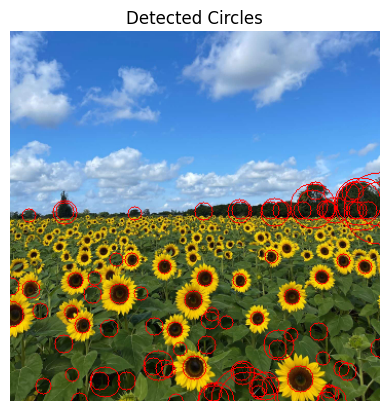

In [1]:
import cv2 as cv
import numpy as np
from scipy.ndimage import maximum_filter
import matplotlib.pyplot as plt

#load image in reduced color
im = cv.imread('(2.1).jpeg', cv.IMREAD_REDUCED_COLOR_4)
#convert to grayscale
gray_im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Define a range of sigma values
sigma_values = np.arange(5, 51, 0.9)

# Initialize an array to store the scale space
scale_space = []

for sigma in sigma_values:
    # Calculate the LoG kernel for the current sigma 
    kernel_hw = (int(4 * sigma) + 1) // 2
    X, Y = np.meshgrid(np.arange(-kernel_hw, kernel_hw + 1), np.arange(-kernel_hw, kernel_hw + 1))
    LoG = (X ** 2 + Y ** 2 - 2 * sigma ** 2) * np.exp(-(X ** 2 + Y ** 2) / (2 * sigma ** 2))

    # LoG filtering to the grayscale image
    response = cv.filter2D(gray_im.astype(np.float32), -1, LoG)

    # Store the result in the scale space
    scale_space.append(response)

# Convert the scale space to a numpy array
scale_space = np.array(scale_space)

# Find local maxima in the scale space using a maximum filter
local_maxima = maximum_filter(scale_space, size=(3, 3, 3))

# Identify the coordinates of the local maxima
maxima_coordinates = np.argwhere((scale_space == local_maxima) & (local_maxima > 0))

circles_detected = []

for coordinates in maxima_coordinates:
    z, y, x = coordinates
    # Adjust the scale factor to maximize strength
    radius = int(np.sqrt(2) * sigma_values[z])  
    center = (x, y)
    circles_detected.append((center, radius))

largest_circle = max(circles_detected, key=lambda x: x[1])
largest_center, largest_radius = largest_circle
print("Parameters of the Largest Circle:")
print("Center:", largest_center)
print("Radius:", largest_radius)
print("Range of Sigma Values Used:", sigma_values[0], "to", sigma_values[-1])

# Draw detected circles on the original image
output_image = im.copy()
for circle in circles_detected:
    center, radius = circle
    cv.circle(output_image, center, radius, (0, 0, 255), 1)  # Draw circles in red

# Convert BGR image to RGB for Matplotlib
output_image_rgb = cv.cvtColor(output_image, cv.COLOR_BGR2RGB)

# Display the image with detected circles using Matplotlib

plt.imshow(output_image_rgb)
plt.title("Detected Circles")
plt.axis('off')
plt.show()


